# FRC Stat Sheet
Visualization of score from the Hudson Valley 2018 regional, and New York City Regional.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from urllib.request import Request, urlopen
import json

def get_json(url):
    hdr = { 
        'X-TBA-Auth-Key' : '9l2oKd2IBt1TrlCxGhAl6pa6z06rNGcbDQrQ0EXFcMa7eCtPBdltgM5Tc69nwTOo', 
        'User-Agent': 'Mozilla /5.0 (Compatible MSIE 9.0;Windows NT 6.1;WOW64; Trident/5.0)' 
    }
    req = Request(url=url, headers=hdr)
    response = urlopen(req)
    json_text = json.loads(response.read())
    response.close()
    return json_text

Populating the interactive namespace from numpy and matplotlib


# Hudson Valley 2018

In [2]:
json_data = get_json('https://www.thebluealliance.com/api/v3/event/2018nysu/matches')

In [3]:
nysu_2018 = pd.io.json.json_normalize(data=json_data, meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [4]:
nysu_2018['actual_time'] = pd.to_datetime(nysu_2018['actual_time'], unit='s')
nysu_2018.drop('alliances.blue.dq_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.blue.surrogate_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.red.dq_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.red.surrogate_team_keys', axis=1, inplace=True)
nysu_2018.drop('time', axis=1, inplace=True)
nysu_2018.drop('videos', axis=1, inplace=True)
nysu_2018.drop('post_result_time', axis=1, inplace=True)
nysu_2018.drop('predicted_time', axis=1, inplace=True)
list(nysu_2018)

['actual_time',
 'alliances.blue.score',
 'alliances.blue.team_keys',
 'alliances.red.score',
 'alliances.red.team_keys',
 'comp_level',
 'event_key',
 'key',
 'match_number',
 'score_breakdown.blue.adjustPoints',
 'score_breakdown.blue.autoOwnershipPoints',
 'score_breakdown.blue.autoPoints',
 'score_breakdown.blue.autoQuestRankingPoint',
 'score_breakdown.blue.autoRobot1',
 'score_breakdown.blue.autoRobot2',
 'score_breakdown.blue.autoRobot3',
 'score_breakdown.blue.autoRunPoints',
 'score_breakdown.blue.autoScaleOwnershipSec',
 'score_breakdown.blue.autoSwitchAtZero',
 'score_breakdown.blue.autoSwitchOwnershipSec',
 'score_breakdown.blue.endgamePoints',
 'score_breakdown.blue.endgameRobot1',
 'score_breakdown.blue.endgameRobot2',
 'score_breakdown.blue.endgameRobot3',
 'score_breakdown.blue.faceTheBossRankingPoint',
 'score_breakdown.blue.foulCount',
 'score_breakdown.blue.foulPoints',
 'score_breakdown.blue.rp',
 'score_breakdown.blue.tba_gameData',
 'score_breakdown.blue.techFoulC

In [5]:
nysu_2018_qm = nysu_2018[nysu_2018['comp_level'] == 'qm']
auto_scores = [nysu_2018_qm['score_breakdown.blue.autoPoints'], nysu_2018_qm['score_breakdown.red.autoPoints']]
nysu_auto_scores = pd.concat(auto_scores)

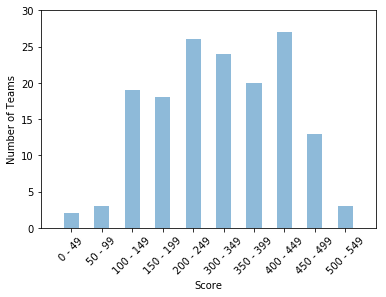

In [6]:
score_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hist(pd.concat([nysu_2018_qm['alliances.blue.score'], nysu_2018_qm['alliances.red.score']]), 
     rwidth=.5, alpha=0.5, align='left', bins=score_bins)
xlim([-50, 500])
ylim([0, 30])
xlabel('Score')
score_labels = ['0 - 49', '50 - 99', '100 - 149', '150 - 199', '200 - 249', '300 - 349', '350 - 399', '400 - 449', 
                '450 - 499', '500 - 549']
xticks(arange(0, 500, 50), score_labels, rotation=45)
ylabel('Number of Teams')
figsize(12, 8)

()

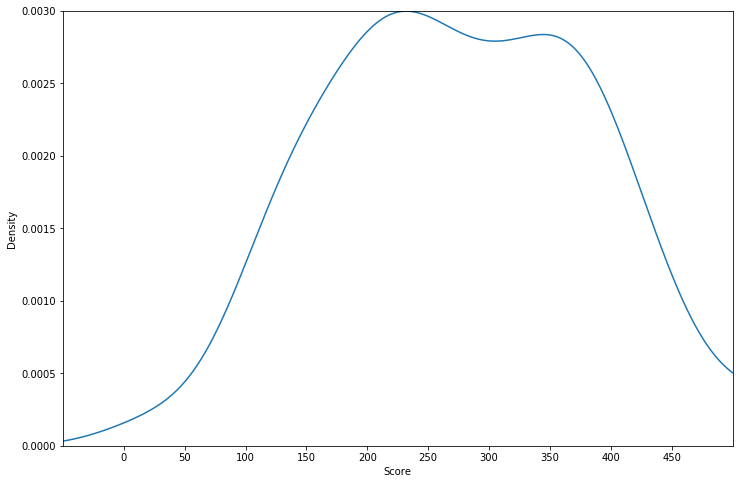

In [7]:
nysu_scores = pd.concat([nysu_2018_qm['alliances.blue.score'], nysu_2018_qm['alliances.red.score']])
nysu_scores.plot('kde')
xlim([-50, 500])
ylim([0, 0.003])
xlabel('Score')
xticks(arange(0, 500, 50))
figsize(12, 8)
/

### Auto Scores of Alliances Qualification Matches
Most teams only decided to cross the auton line, some decided to get ownership points

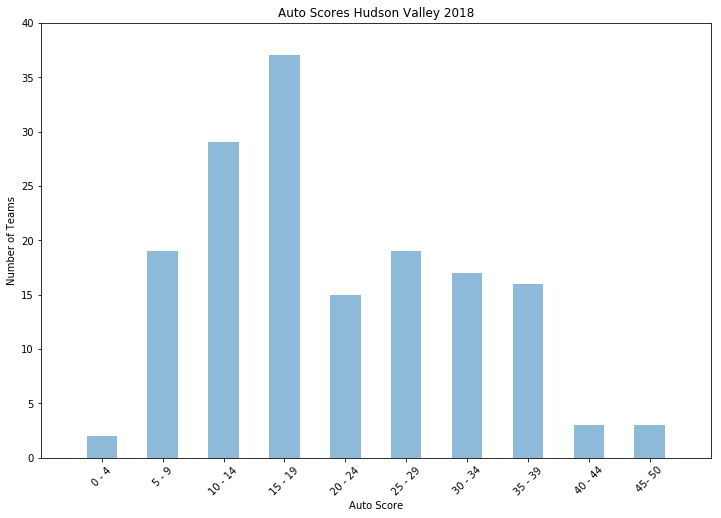

In [8]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
nysu_auto_hist = hist(nysu_auto_scores, rwidth=.5, alpha=0.5, align='left', bins=bins)
title('Auto Scores Hudson Valley 2018')
xlim([-5, 50])
ylim([0, 40])
auto_score_label = '0 - 4, 5 - 9, 10 - 14, 15 - 19, 20 - 24, 25 - 29, 30 - 34, 35 - 39, 40 - 44, 45- 50'.split(', ')
xlabel('Auto Score')
xticks(range(0, 50, 5), auto_score_label, rotation=45)
ylabel('Number of Teams')
figsize(12, 8)

### Distribution of Auto Scores
The peak at 15 points shows that most alliances only crossed the auton line

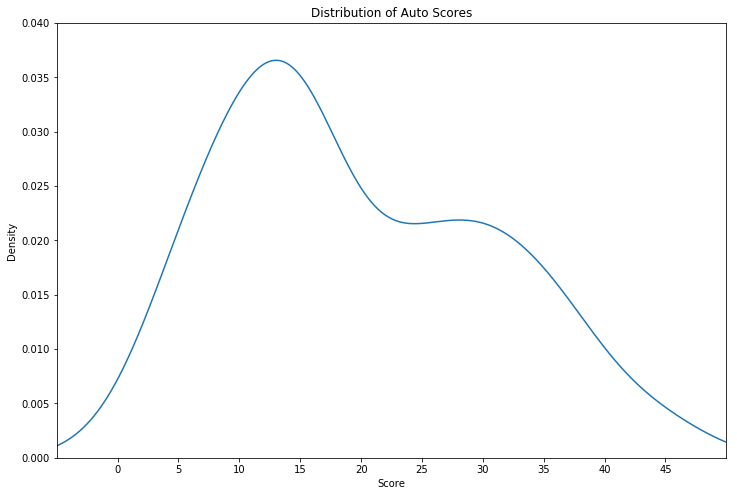

In [9]:
nysu_auto_scores.plot(kind='kde')
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Distribution of Auto Scores')
figsize(12, 8)

### Scatter Plot of Overall Score vs Auto Score
There is somewhat of a correlation of between the overall score and auto score of alliances

In [10]:
pd.options.mode.chained_assignment = None
nysu_2018_qm['blue won'] = nysu_2018_qm['winning_alliance'].map(lambda x: x == 'blue')
nysu_2018_qm['red won'] = nysu_2018_qm['winning_alliance'].map(lambda x: x == 'red')

Text(0.5,20.8,'Score')

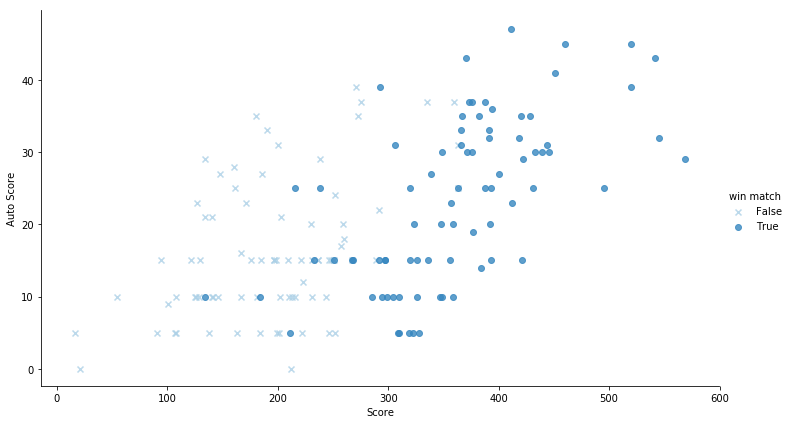

In [11]:
nysu_red_list = [nysu_2018_qm['alliances.red.score'], 
                      nysu_2018_qm['score_breakdown.red.autoPoints'], 
                      nysu_2018_qm['red won']]

nysu_blue_list = [nysu_2018_qm['alliances.blue.score'], 
                       nysu_2018_qm['score_breakdown.blue.autoPoints'], 
                       nysu_2018_qm['blue won']]

nysu_red = pd.concat(nysu_red_list, axis=1, keys=['score', 'auto', 'win match'])
nysu_blue = pd.concat(nysu_blue_list, axis=1, keys=['score', 'auto', 'win match'])

nysu = pd.concat([nysu_red, nysu_blue])

sns.lmplot(data=nysu, x='score', y='auto', hue='win match', fit_reg=False, markers=['x', 'o'],
          palette='Blues', height=6, aspect=1.70)
ylabel('Auto Score')
xlabel('Score')

### Scatter Plot of Foul Points vs Overall Score

Text(0.5,20.8,'Score')

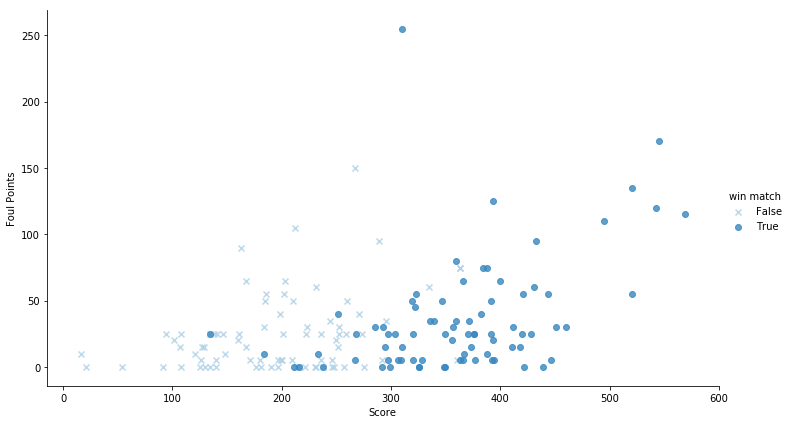

In [12]:
nysu_foul_points = pd.concat([nysu_2018_qm['score_breakdown.red.foulPoints'], 
                              nysu_2018_qm['score_breakdown.blue.foulPoints']])

nysu['foul points'] = nysu_foul_points

sns.lmplot(data=nysu, x='score', y='foul points', hue='win match', fit_reg=False, markers=['x', 'o'],
          palette='Blues', height=6, aspect=1.7)
ylabel('Foul Points')
xlabel('Score')

Text(0.5,20.8,'Score')

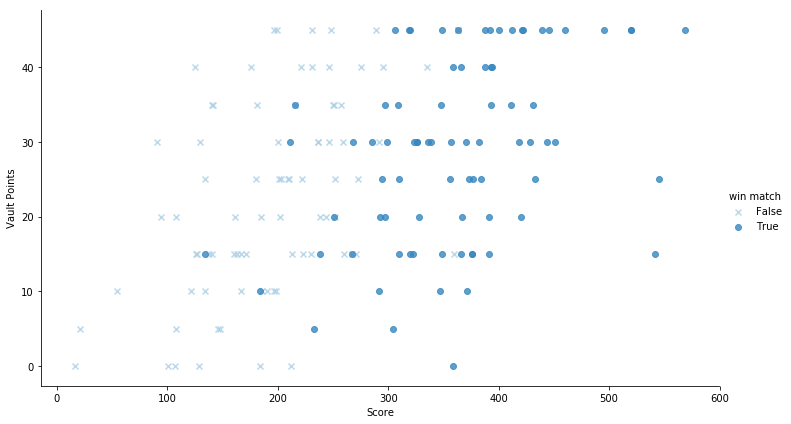

In [13]:
vault_points = pd.concat([nysu_2018_qm['score_breakdown.red.vaultPoints'], 
                         nysu_2018_qm['score_breakdown.blue.vaultPoints']])

nysu['vault points'] = vault_points

sns.lmplot(data=nysu, x='score', y='vault points', hue='win match', fit_reg=False, markers=['x', 'o'],
          palette='Blues', height=6, aspect=1.70)
ylabel('Vault Points')
xlabel('Score')

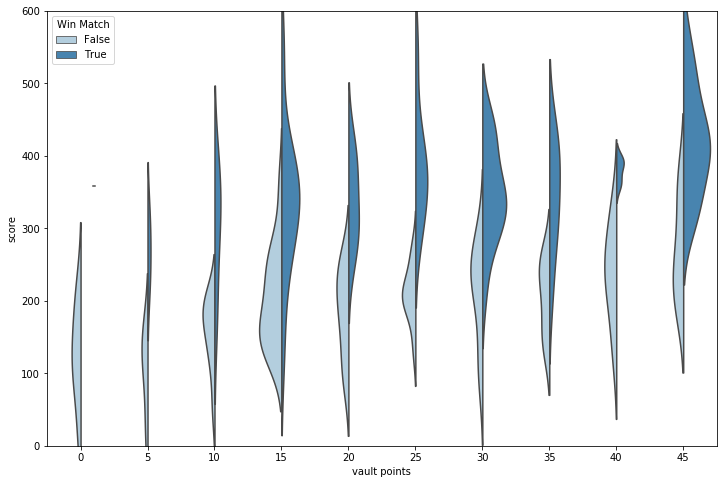

In [14]:
sns.violinplot(data=nysu, x='vault points', y='score', hue='win match', 
               split=True, palette='Blues', inner=None, scale_hue=False, scale='count')
legend(loc='upper left', title='Win Match')
ylim([0, 600])
figsize(12, 8)

Text(0.5,20.8,'Score')

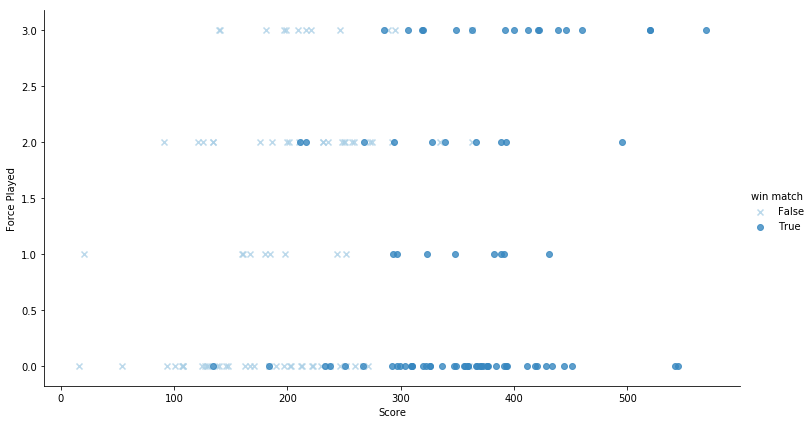

In [15]:
force_played = pd.concat([nysu_2018_qm['score_breakdown.red.vaultForcePlayed'], 
                         nysu_2018_qm['score_breakdown.blue.vaultForcePlayed']])

nysu['force played'] = force_played

sns.lmplot(data=nysu, x='score', y='force played', hue='win match', fit_reg=False, markers=['x', 'o'],
          palette='Blues', height=6, aspect=1.75)
ylabel('Force Played')
xlabel('Score')

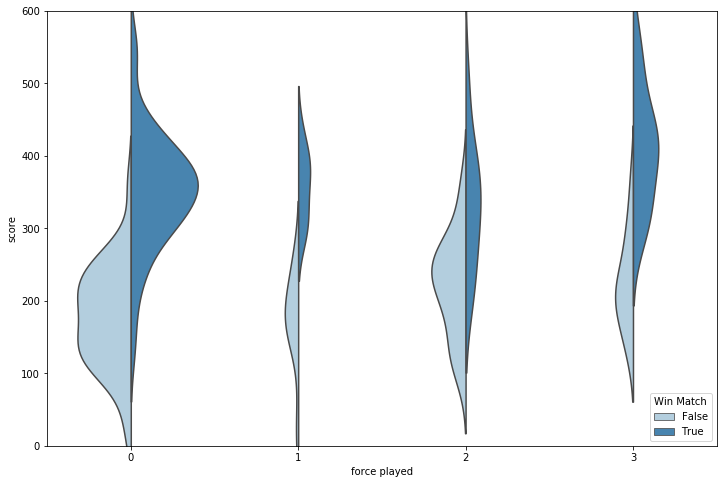

In [16]:
sns.violinplot(data=nysu, x='force played', y='score', hue='win match', 
               split=True, palette='Blues', inner=None, scale_hue=False, scale='count')
legend(loc='lower right', title='Win Match')
ylim([0, 600])
figsize(12, 8)

Text(0.5,20.8,'Score')

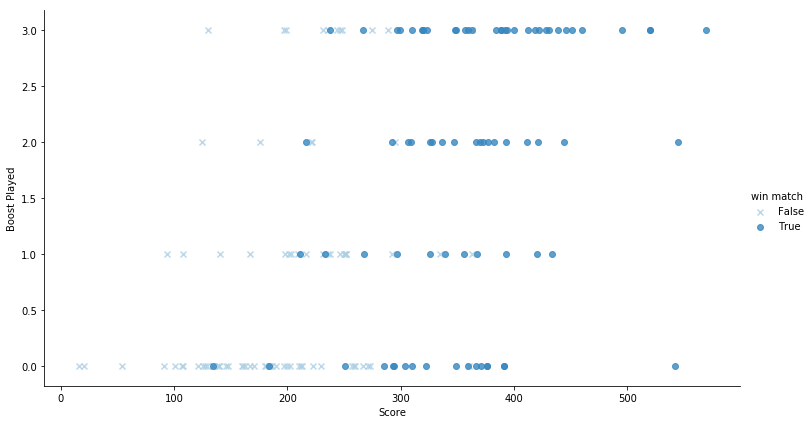

In [17]:
boost_played = pd.concat([nysu_2018_qm['score_breakdown.red.vaultBoostPlayed'], 
                         nysu_2018_qm['score_breakdown.blue.vaultBoostPlayed']])

nysu['boost played'] = boost_played

sns.lmplot(data=nysu, x='score', y='boost played', hue='win match', fit_reg=False, markers=['x', 'o'],
          palette='Blues', height=6, aspect=1.75)
ylabel('Boost Played')
xlabel('Score')

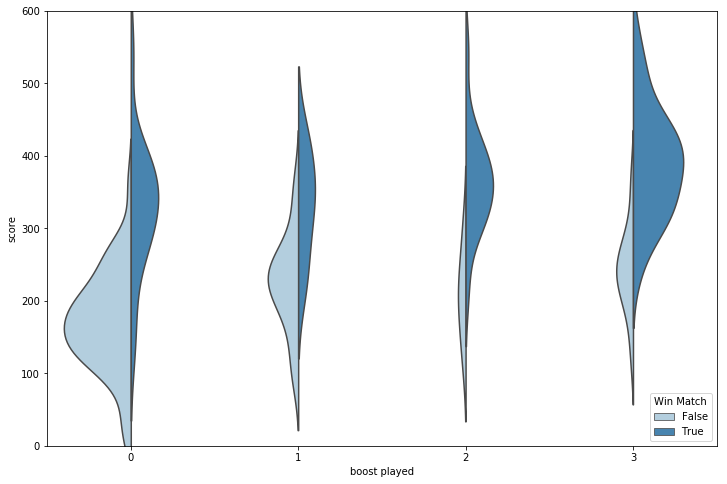

In [18]:
sns.violinplot(data=nysu, x='boost played', y='score', hue='win match', 
               split=True, palette='Blues', inner=None, scale_hue=False, scale='count')
legend(loc='lower right', title='Win Match')
ylim([0, 600])
figsize(12, 8)

# New York City 2018

In [19]:
nyny_2018 = pd.io.json.json_normalize(data=get_json('https://www.thebluealliance.com/api/v3/event/2018nyny/matches'), 
                                      meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [20]:
nyny_2018['actual_time'] = pd.to_datetime(nyny_2018['actual_time'], unit='s')
nyny_2018.drop('alliances.blue.dq_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.blue.surrogate_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.red.dq_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.red.surrogate_team_keys', axis=1, inplace=True)
nyny_2018.drop('time', axis=1, inplace=True)
nyny_2018.drop('videos', axis=1, inplace=True)
nyny_2018.drop('post_result_time', axis=1, inplace=True)
nyny_2018.drop('predicted_time', axis=1, inplace=True)

In [21]:
nyny_2018_qm = nyny_2018[nyny_2018['comp_level'] == 'qm']
nyny_auto_scores = pd.concat([nyny_2018_qm['score_breakdown.blue.autoPoints'], 
                              nyny_2018_qm['score_breakdown.red.autoPoints']])

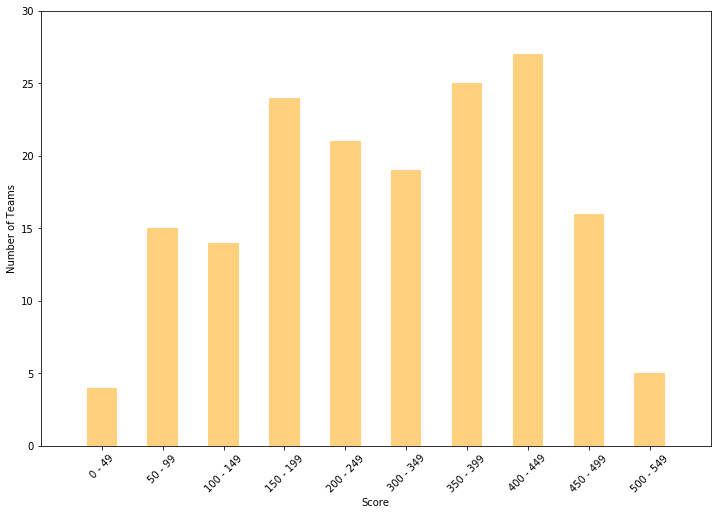

In [22]:
hist(pd.concat([nyny_2018_qm['alliances.blue.score'], nyny_2018_qm['alliances.red.score']]), 
     rwidth=.5, alpha=0.5, align='left', bins=score_bins, color='orange')
xlim([-50, 500])
ylim([0, 30])
xlabel('Score')
xticks(arange(0, 500, 50), score_labels, rotation=45)
ylabel('Number of Teams')
figsize(12, 8)

()

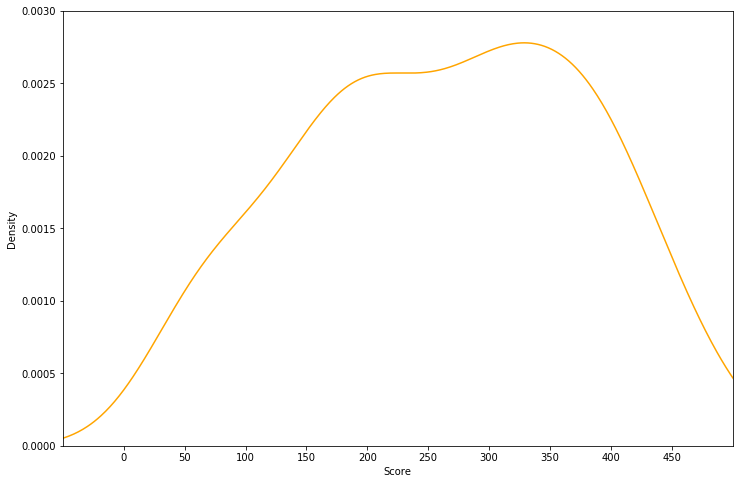

In [23]:
nyny_scores = pd.concat([nyny_2018_qm['alliances.blue.score'], nyny_2018_qm['alliances.red.score']])
nyny_scores.plot('kde', color='orange')
xlim([-50, 500])
ylim([0, 0.003])
xlabel('Score')
xticks(arange(0, 500, 50))
figsize(12, 8)
/

### Auto Scores of Alliances Qualification Matches

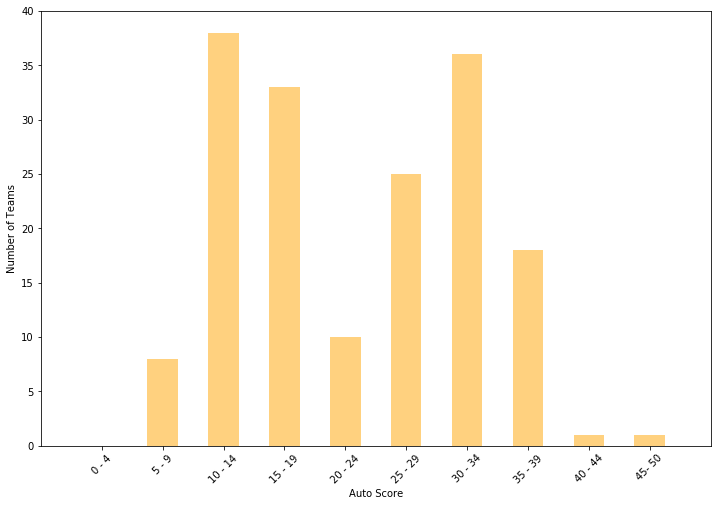

In [24]:
nyny_auto_hist = hist(nyny_auto_scores, rwidth=.5, alpha=0.5, align='left', bins=bins, color='orange')
xlabel('Auto Score')
xlim([-5, 50])
ylim([0, 40])
xlabel('Auto Score')
xticks(range(0, 50, 5), auto_score_label, rotation=45)
ylabel('Number of Teams')
figsize(12, 8)

### Distribution of Auto Scores

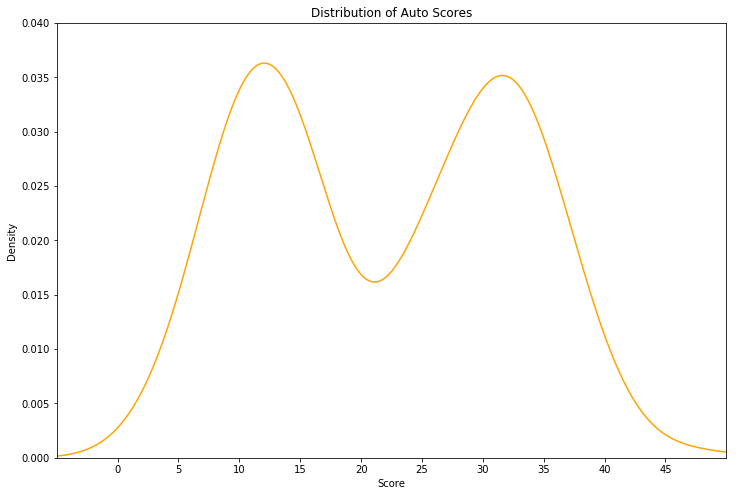

In [25]:
nyny_auto_scores.plot(kind='kde', color='orange')
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Distribution of Auto Scores')
figsize(12, 8)

### Scatter Plot of Overall Score vs Auto Score

Text(0.5,1,'Overall Score v. Auto Score')

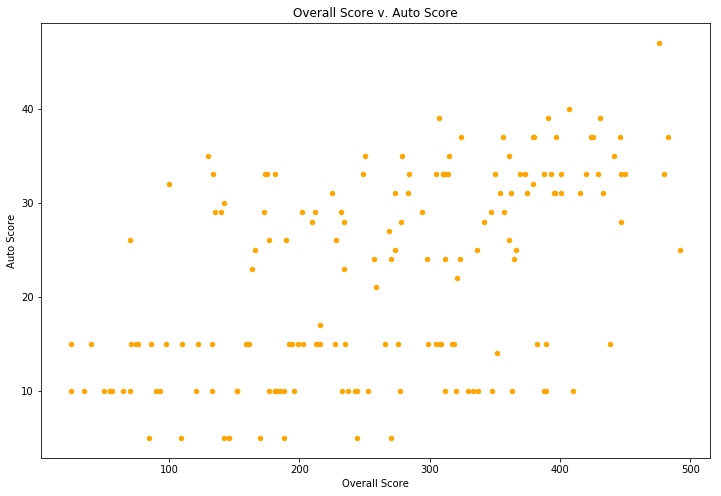

In [26]:
nyny_2018_qm.plot(x=['alliances.blue.score', 'alliances.red.score'], 
                  y=['score_breakdown.blue.autoPoints', 'score_breakdown.red.autoPoints'], 
                  kind='scatter', color='orange')
xlabel('Overall Score')
ylabel('Auto Score')
title('Overall Score v. Auto Score')


# Hudson Valley vs New York City
The scores are more distributed to the right in New York City

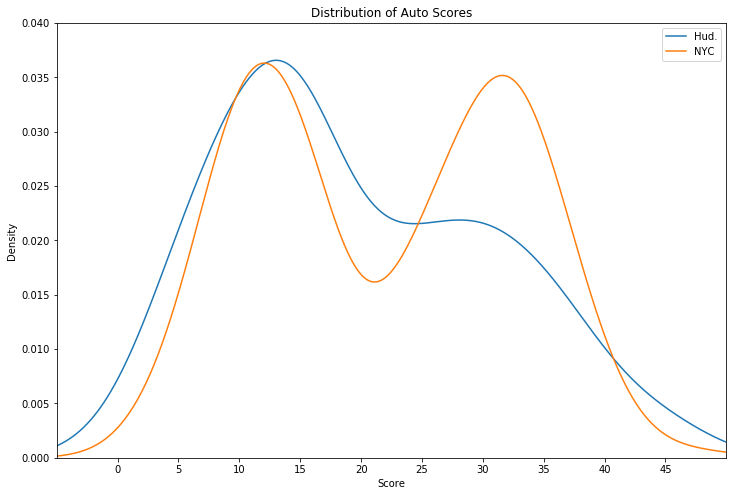

In [27]:
subplot(nysu_auto_scores.plot(kind='kde'), nyny_auto_scores.plot(kind='kde'))
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Distribution of Auto Scores')
legend(['Hud.', 'NYC'])
figsize(12, 8)

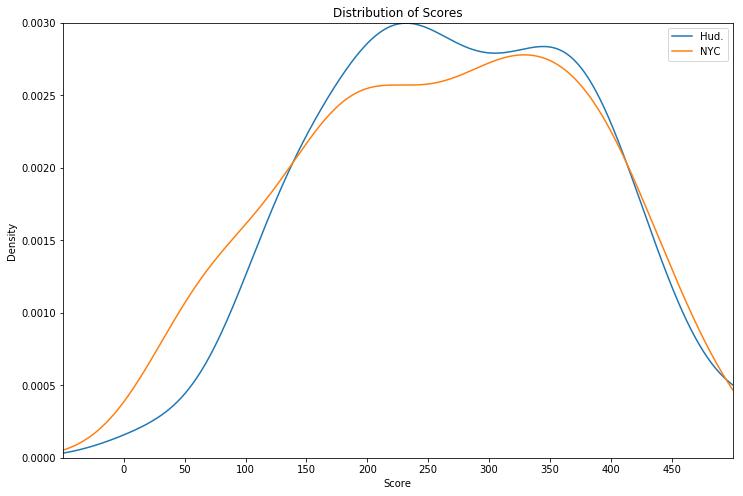

In [28]:
subplot(nysu_scores.plot(kind='kde'), nyny_scores.plot(kind='kde'))
xlim([-50, 500])
xticks(range(0, 500, 50))
ylim([0, 0.003])
xlabel('Score')
title('Distribution of Scores')
legend(['Hud.', 'NYC'])
figsize(12, 8)